In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# !kaggle datasets download -d arnabchaki/data-science-salaries-2023

In [3]:
# !unzip -o data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [4]:
df = pd.read_csv("./ds_salaries.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## EDA

In [5]:
value_counts = {column: df[column].value_counts() for column in df.columns}
value_counts

{'work_year': 2023    1785
 2022    1664
 2021     230
 2020      76
 Name: work_year, dtype: int64,
 'experience_level': SE    2516
 MI     805
 EN     320
 EX     114
 Name: experience_level, dtype: int64,
 'employment_type': FT    3718
 PT      17
 CT      10
 FL      10
 Name: employment_type, dtype: int64,
 'job_title': Data Engineer                          1040
 Data Scientist                          840
 Data Analyst                            612
 Machine Learning Engineer               289
 Analytics Engineer                      103
                                        ... 
 Principal Machine Learning Engineer       1
 Azure Data Engineer                       1
 Manager Data Management                   1
 Marketing Data Engineer                   1
 Finance Data Analyst                      1
 Name: job_title, Length: 93, dtype: int64,
 'salary': 100000    112
 150000    100
 120000     99
 160000     85
 130000     85
          ... 
 241871      1
 93919       1
 3850

In [6]:
numerical_features = [feat for feat in df.select_dtypes("int64")]
categorical_features = [cat for cat in df.select_dtypes("object")]

print(numerical_features)
print(categorical_features)

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


#### Categorical Data Analysis

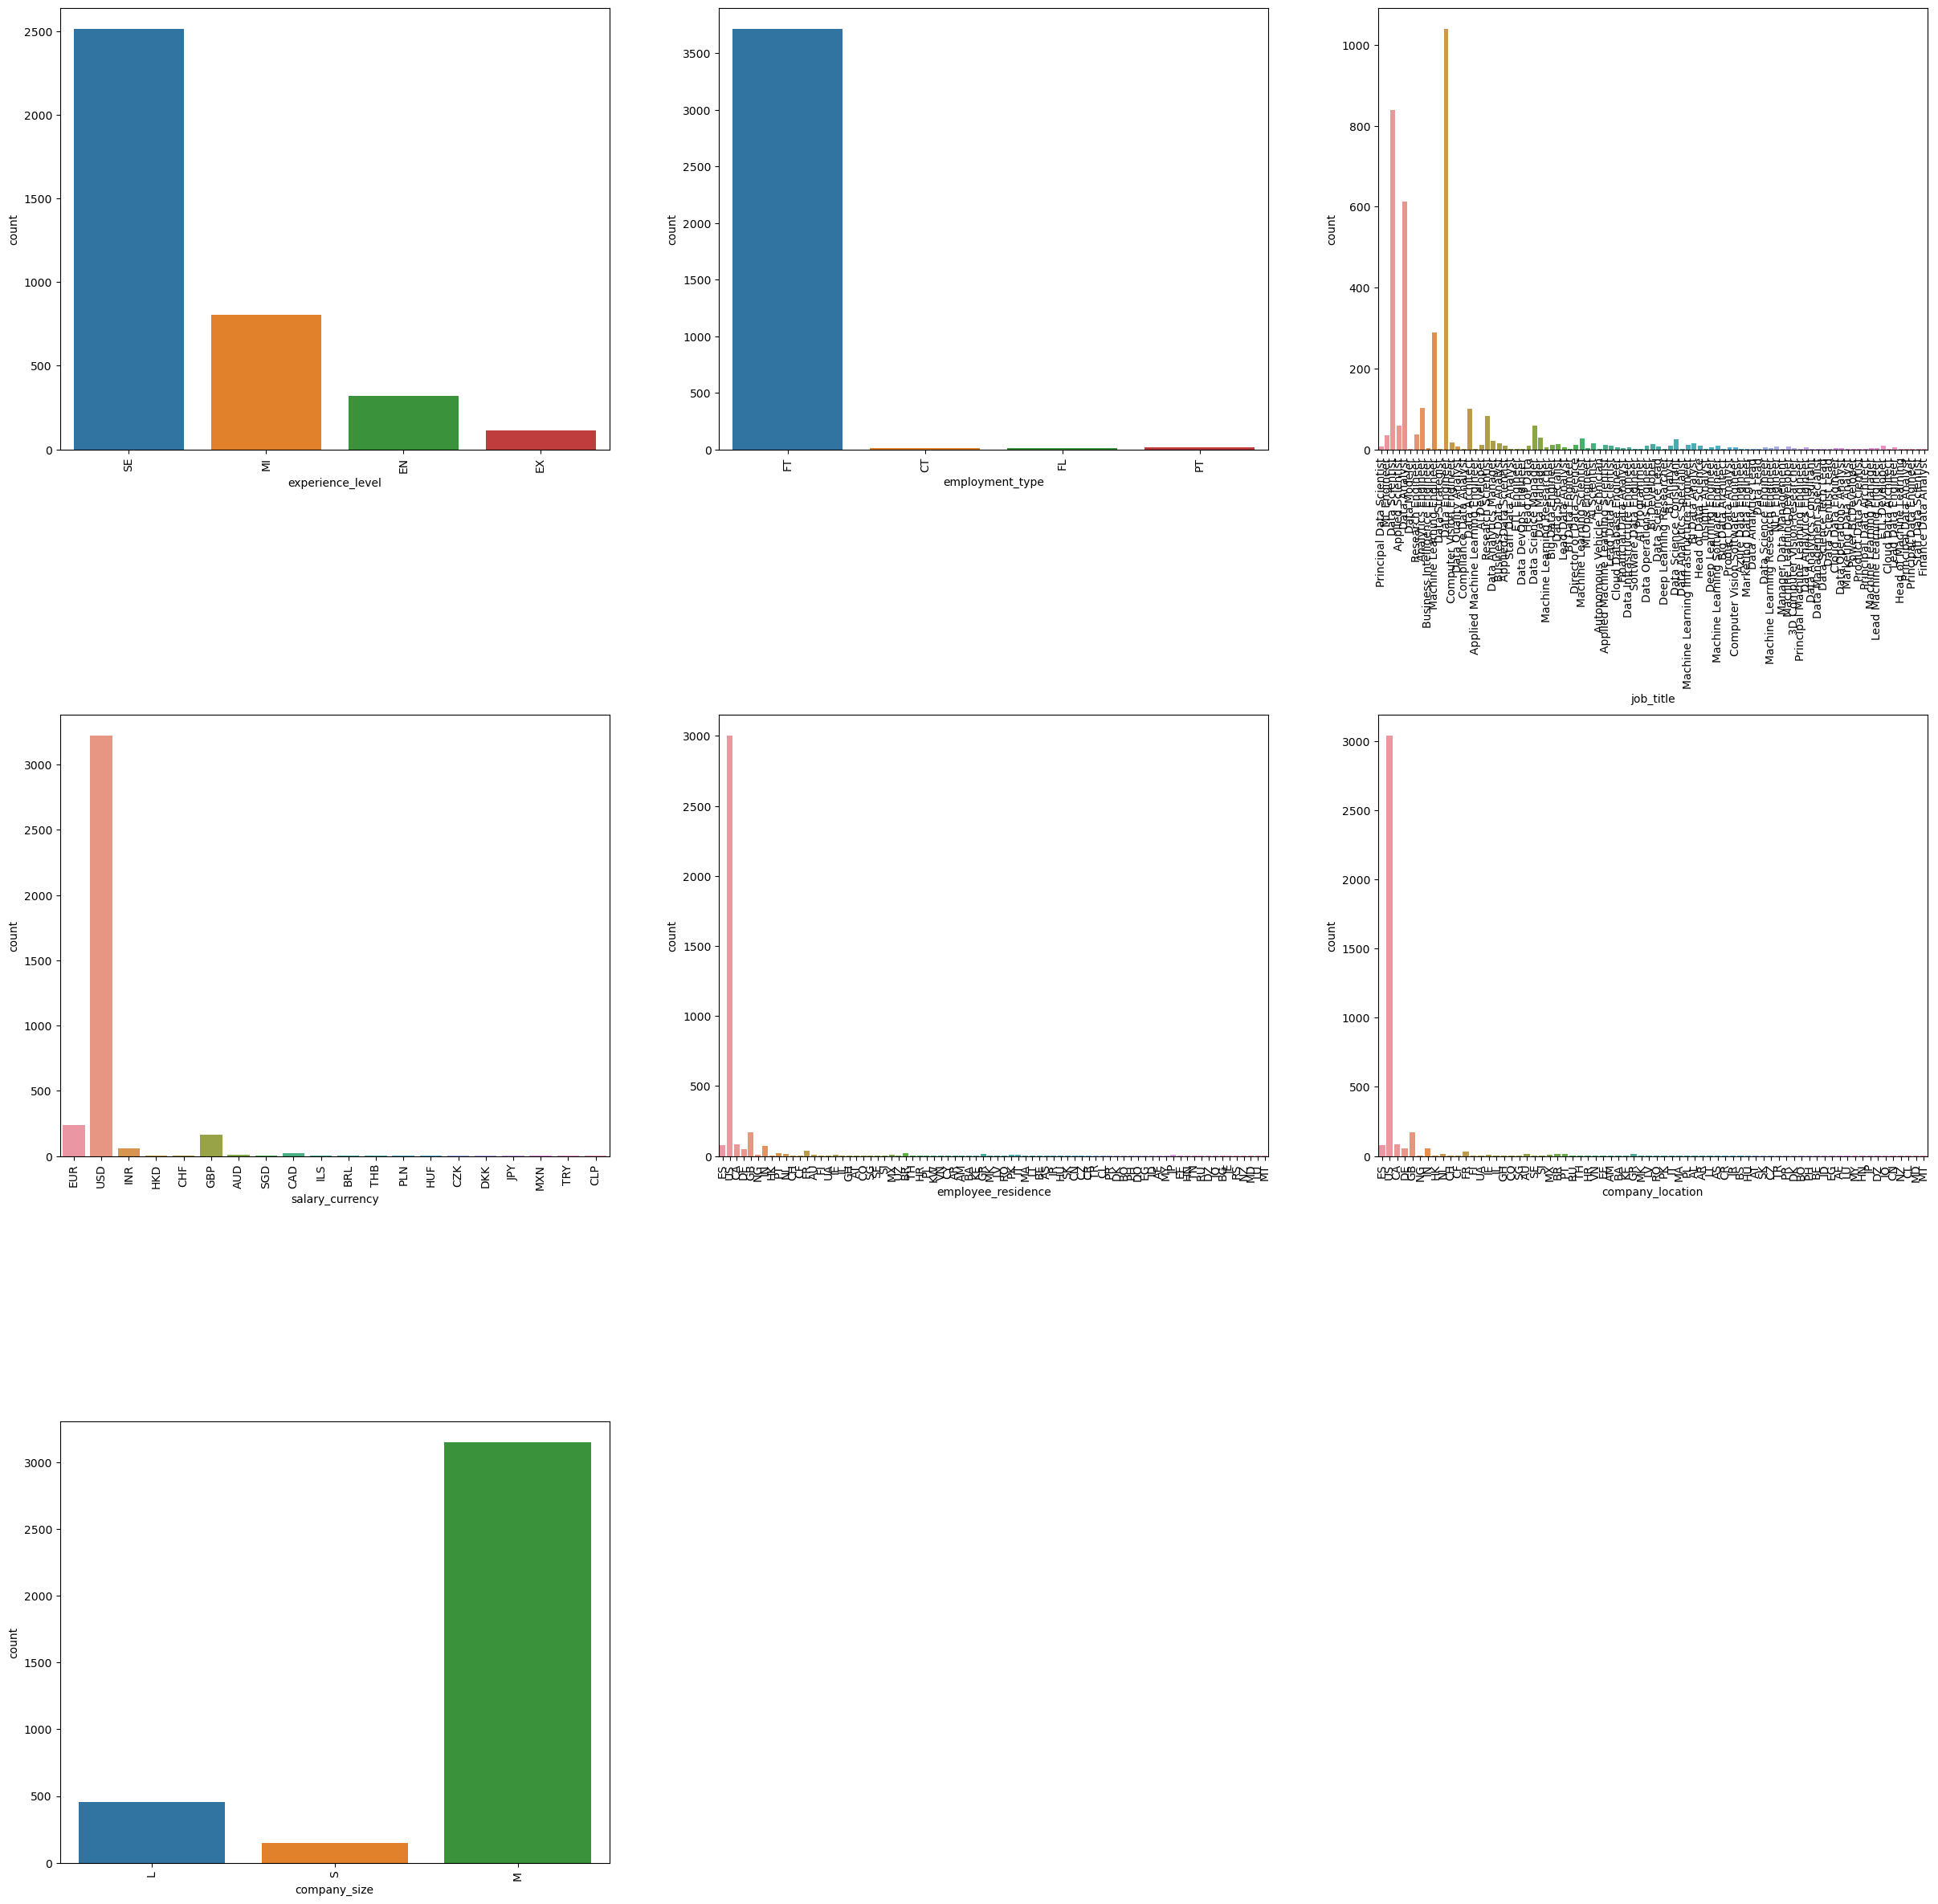

In [7]:
n_col = 3
n_row = len(categorical_features) // n_col + 1
plt.figure(figsize=(10 * n_col, 10 * n_row))

n = 0
for i in categorical_features:
    n += 1
    plt.subplot(n_row, n_col, n)
    plt.subplots_adjust(hspace=0.6, wspace=0.2)
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)

plt.show()

#### Numerical Data Analysis

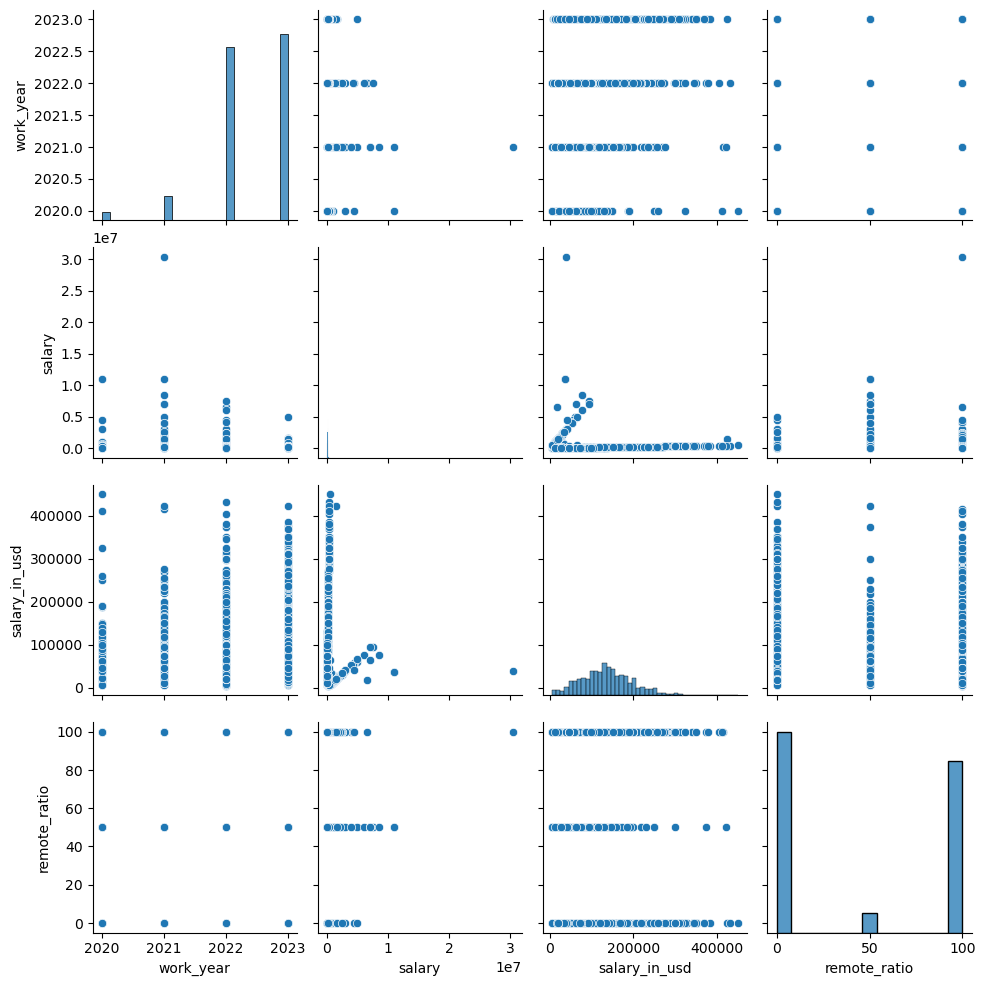

In [8]:
sns.pairplot(data=df.loc[:, numerical_features])

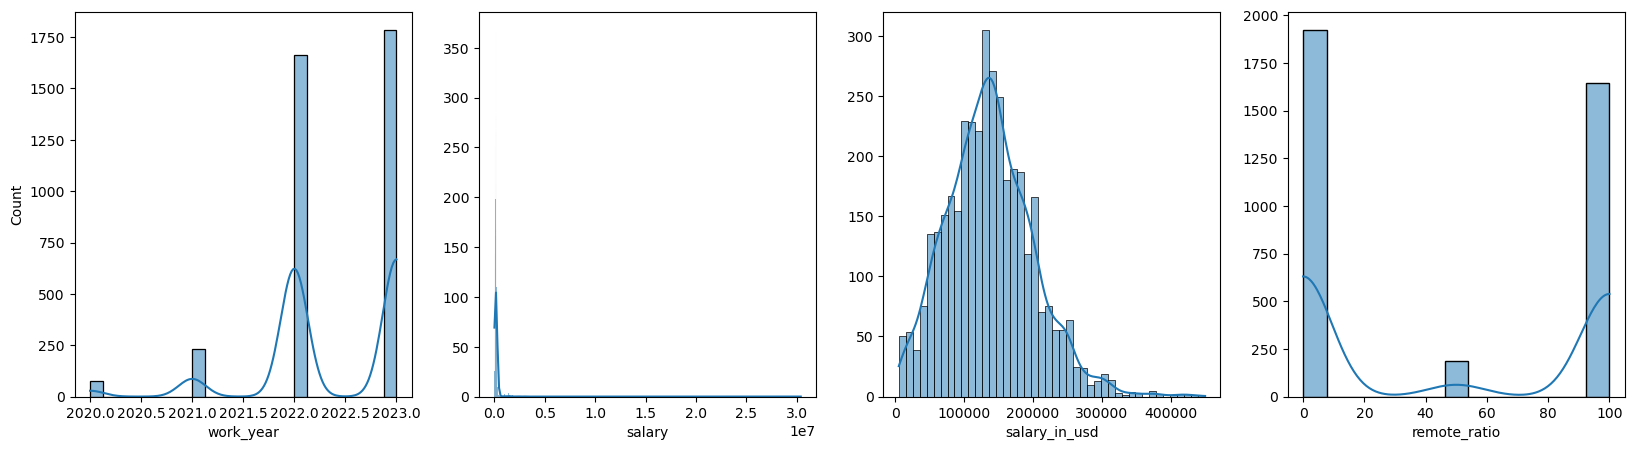

In [9]:
plt.figure(figsize=(20, 5))

n = 0
for feature in numerical_features:
    n += 1
    plt.subplot(1, len(numerical_features), n)
    sns.histplot(data=df[feature], kde=True)
    plt.ylabel("Count" if n == 1 else "")

plt.show()

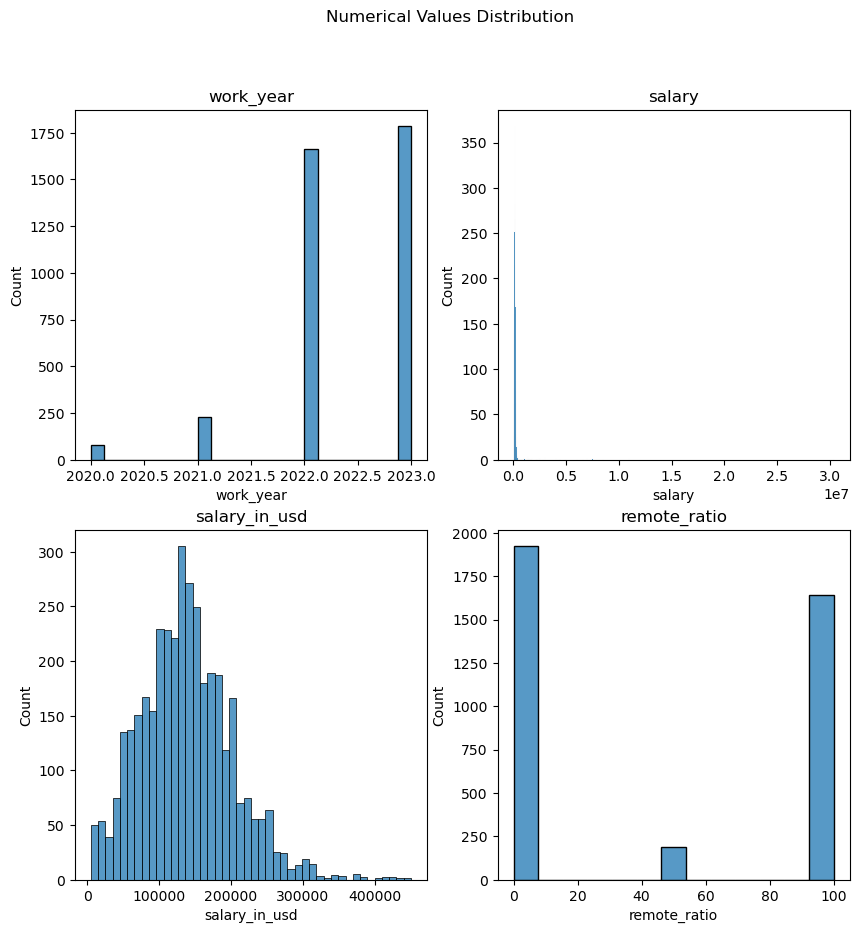

In [10]:
plt.figure(figsize=(10, 10))
plt.suptitle("Numerical Values Distribution")

n = 0
for feature in numerical_features:
    n += 1
    plt.subplot(2, 2, n)
    sns.histplot(data=df[feature])
    plt.title(feature)
    # plt.tight_layout()

plt.show()

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

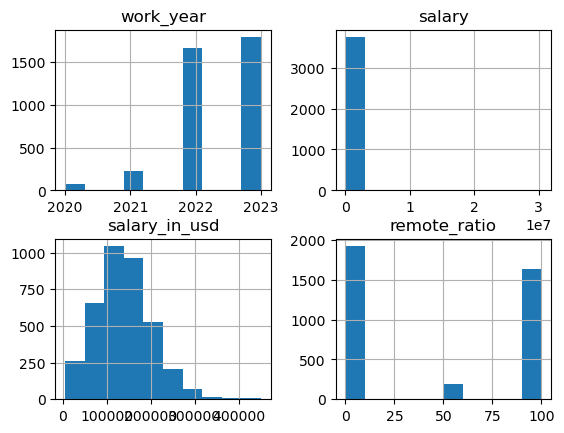

In [11]:
df.hist()

## Data Preprocessing

In [12]:
print(df.isna().sum())
print(df.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


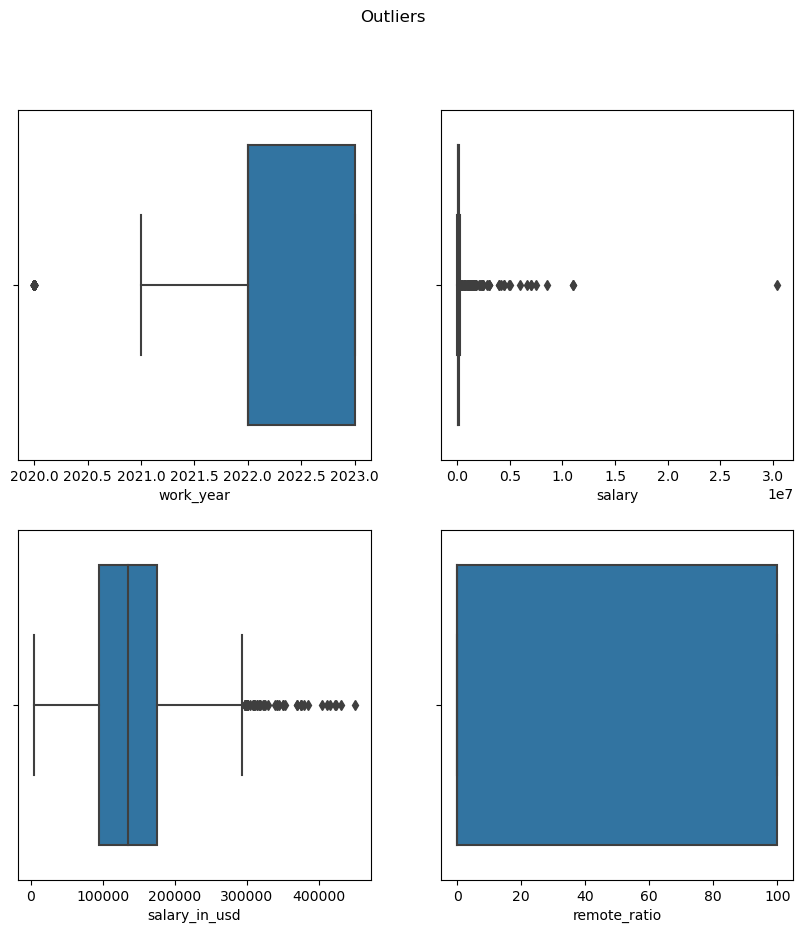

In [13]:
plt.figure(figsize=(10, 10))
plt.suptitle("Outliers")

n = 0
for feature in numerical_features:
    n += 1
    plt.subplot(2, 2, n)
    sns.boxplot(data=df, x=feature)

plt.show()

In [14]:
for feature in categorical_features:
    print(df[feature].value_counts())
    print(50 * "-")

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64
--------------------------------------------------
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64
--------------------------------------------------
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64
--------------------------------------------------
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY 

In [15]:
for feature in categorical_features:
    df[feature] = df[feature].factorize()[0]

<Axes: >

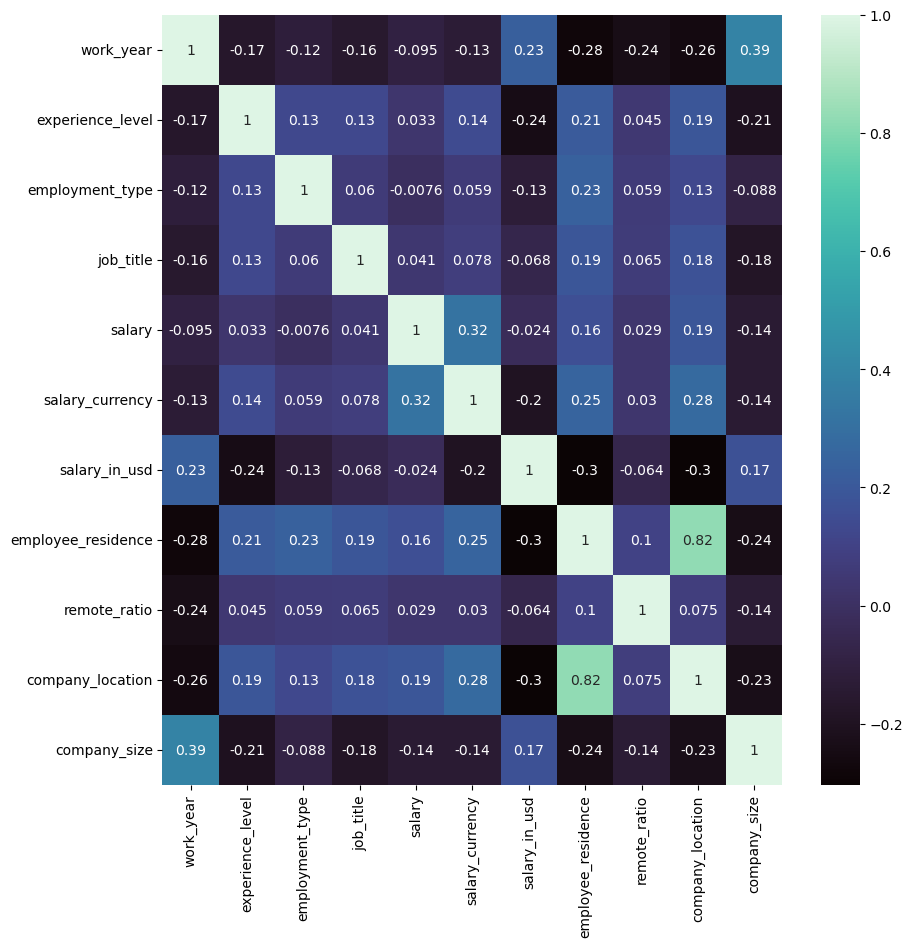

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True, cmap="mako")

In [17]:
cor = df.corr()["salary"].sort_values(ascending=False)
corr_with_salary = pd.DataFrame(
    {"Features": cor.index, "Correlation with salary": cor.values}
)
corr_with_salary

,Features,Correlation with salary
0,salary,1.000000
1,salary_currency,0.317689
2,company_location,0.189461
3,employee_residence,0.158832
4,job_title,0.041307
5,experience_level,0.032708
6,remote_ratio,0.028731
7,employment_type,-0.007644
8,salary_in_usd,-0.023676
9,work_year,-0.094724


## Modelling

In [24]:
used_features = [3, 6]
X = df.iloc[:, used_features].values
X

array([[     0,  85847],
       [     1,  30000],
       [     1,  25500],
       ...,
       [     2, 105000],
       [    20, 100000],
       [    26,  94665]])

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

min_cluster = 2
max_cluster = 10

wcss = []
scores = []

for i in range(min_cluster, max_cluster + 1):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(X, labels)
    scores.append(silhouette_avg)
    print(f"WCSS Score for {i} cluster is {wcss}")
    print(f"Silhouette Score for {i} cluster is {silhouette_avg}\n")

WCSS Score for 2 cluster is [5809499069687.755]
Silhouette Score for 2 cluster is 0.540347530161809

WCSS Score for 3 cluster is [5809499069687.755, 2998137631639.8438]
Silhouette Score for 3 cluster is 0.5361099524206989

WCSS Score for 4 cluster is [5809499069687.755, 2998137631639.8438, 1814201389786.0122]
Silhouette Score for 4 cluster is 0.5427074560339353

WCSS Score for 5 cluster is [5809499069687.755, 2998137631639.8438, 1814201389786.0122, 1253321060782.795]
Silhouette Score for 5 cluster is 0.5353302414646676

WCSS Score for 6 cluster is [5809499069687.755, 2998137631639.8438, 1814201389786.0122, 1253321060782.795, 893056095804.4194]
Silhouette Score for 6 cluster is 0.5438264689368463

WCSS Score for 7 cluster is [5809499069687.755, 2998137631639.8438, 1814201389786.0122, 1253321060782.795, 893056095804.4194, 665276116310.4652]
Silhouette Score for 7 cluster is 0.5391549428613271

WCSS Score for 8 cluster is [5809499069687.755, 2998137631639.8438, 1814201389786.0122, 1253321

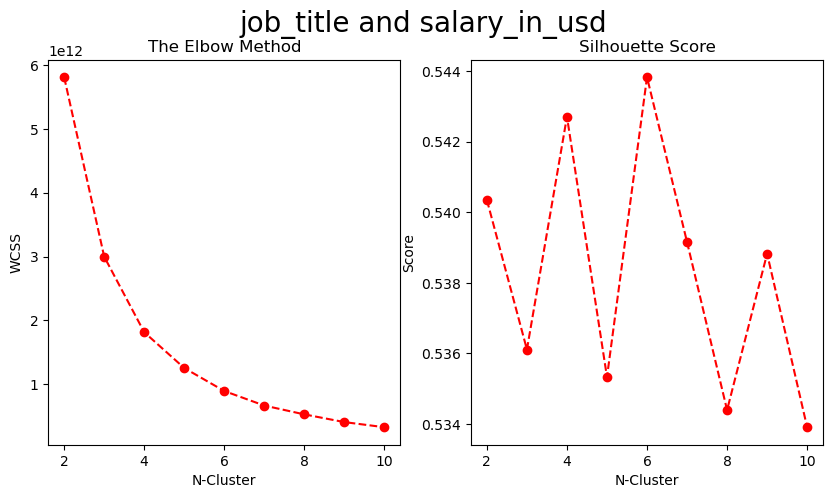

In [26]:
plt.figure(figsize=(10, 5))
plt.suptitle(f"{df.columns[used_features[0]]} and {df.columns[used_features[1]]}", fontsize=20)

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.plot(
        range(min_cluster, max_cluster + 1),
        wcss if i == 0 else scores,
        marker="o",
        linestyle="--",
        color="r",
    )
    plt.title("The Elbow Method" if i == 0 else "Silhouette Score")
    plt.xlabel("N-Cluster")
    plt.ylabel("WCSS" if i == 0 else "Score")

plt.show()

In [27]:
max_silhouette_cluster = scores.index(max(scores)) + min_cluster
max_silhouette_cluster

6

In [28]:
preferred_cluster = max_silhouette_cluster
# preferred_cluster = 4
km_model = KMeans(
    n_clusters=preferred_cluster,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=0,
)
y_kmeans = km_model.fit_predict(X)

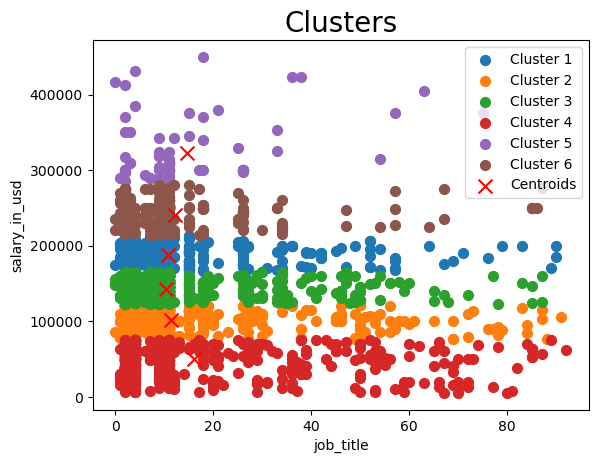

In [29]:
for cluster_label in range(preferred_cluster):
    plt.scatter(
        X[y_kmeans == cluster_label, 0],
        X[y_kmeans == cluster_label, 1],
        s=50,
        cmap="viridis",
        label=f"Cluster {cluster_label + 1}",
    )

plt.scatter(
    km_model.cluster_centers_[:, 0],
    km_model.cluster_centers_[:, 1],
    c="red",
    marker="x",
    s=100,
    label="Centroids",
)
plt.title("Clusters", fontsize=20)
plt.xlabel(df.columns[used_features[0]])
plt.ylabel(df.columns[used_features[1]])
plt.legend()
plt.show()